In [1]:
# PCA section, Correlation, Heatmaps,  plots can be seen to be the most important

In [2]:
# For plotting, import libraries

from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
classForAnalysis = 2

In [5]:
# data exploration
import pandas as pd
#df = pd.read_csv('../nhanes_input_data/newdietaryIntakeDataForClassificationAndAnalysisData.csv')
df = pd.read_csv('../nhanes_output_data/classifiedGroups/2022-12-01/' + str(classForAnalysis) + '_dietaryIntakeDataForClassificationAndAnalysisData.csv')
df.head()

,RIDAGEYR_Age_in_years_at_screening,URDACT_Albumin_creatinine_ratio_mg_g,DataYear,SEQN - Respondent sequence number,WTDRD1 - Dietary day one sample weight,WTDR2D - Dietary two-day sample weight,DR1ILINE - Food/Individual component number,DR1DRSTZ - Dietary recall status,DR1EXMER - Interviewer ID code,DRABF - Breast-fed infant (either day),...,DR1IM181 - MFA 18:1 (Octadecenoic) (gm),DR1IM201 - MFA 20:1 (Eicosenoic) (gm),DR1IM221 - MFA 22:1 (Docosenoic) (gm),DR1IP182 - PFA 18:2 (Octadecadienoic) (gm),DR1IP183 - PFA 18:3 (Octadecatrienoic) (gm),DR1IP184 - PFA 18:4 (Octadecatetraenoic) (gm),DR1IP204 - PFA 20:4 (Eicosatetraenoic) (gm),DR1IP205 - PFA 20:5 (Eicosapentaenoic) (gm),DR1IP225 - PFA 22:5 (Docosapentaenoic) (gm),DR1IP226 - PFA 22:6 (Docosahexaenoic) (gm)
0,3,3.19,2017-2018,101691.0,12206.269054,24604.992029,1.0,1.0,87.0,2.0,...,0.790,0.018,0.001,0.732,0.026,0.0,0.000,0.000,0.000,0.0
1,3,3.19,2017-2018,101691.0,12206.269054,24604.992029,10.0,1.0,87.0,2.0,...,2.846,0.026,0.000,1.219,0.165,0.0,0.015,0.000,0.000,0.0
2,3,3.19,2017-2018,101691.0,12206.269054,24604.992029,11.0,1.0,87.0,2.0,...,0.767,0.141,0.000,1.033,0.008,0.0,0.000,0.000,0.000,0.0
3,3,3.19,2017-2018,101691.0,12206.269054,24604.992029,12.0,1.0,87.0,2.0,...,0.012,0.000,0.000,0.082,0.017,0.0,0.000,0.000,0.000,0.0
4,3,3.19,2017-2018,101691.0,12206.269054,24604.992029,2.0,1.0,87.0,2.0,...,2.258,0.013,0.000,0.374,0.039,0.0,0.013,0.003,0.007,0.0


In [6]:
df.describe()

,RIDAGEYR_Age_in_years_at_screening,URDACT_Albumin_creatinine_ratio_mg_g,SEQN - Respondent sequence number,WTDRD1 - Dietary day one sample weight,WTDR2D - Dietary two-day sample weight,DR1ILINE - Food/Individual component number,DR1DRSTZ - Dietary recall status,DR1EXMER - Interviewer ID code,DRABF - Breast-fed infant (either day),DRDINT - Number of days of intake,...,DR1IM181 - MFA 18:1 (Octadecenoic) (gm),DR1IM201 - MFA 20:1 (Eicosenoic) (gm),DR1IM221 - MFA 22:1 (Docosenoic) (gm),DR1IP182 - PFA 18:2 (Octadecadienoic) (gm),DR1IP183 - PFA 18:3 (Octadecatrienoic) (gm),DR1IP184 - PFA 18:4 (Octadecatetraenoic) (gm),DR1IP204 - PFA 20:4 (Eicosatetraenoic) (gm),DR1IP205 - PFA 20:5 (Eicosapentaenoic) (gm),DR1IP225 - PFA 22:5 (Docosapentaenoic) (gm),DR1IP226 - PFA 22:6 (Docosahexaenoic) (gm)
count,65637.000000,65637.000000,59401.000000,59401.000000,59401.000000,59401.000000,59401.000000,59401.000000,59401.000000,59401.000000,...,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,14.770693,9.703108,98395.475261,40793.642241,44157.605582,8.011717,1.000556,73.016767,1.999680,1.922392,...,1.856904,0.021970,0.001830,1.220714,0.119456,0.000564,0.010378,0.001456,0.001653,0.002849
std,7.706131,6.067687,2661.533862,43542.323338,55331.143962,5.295277,0.040821,17.450567,0.017882,0.267556,...,3.503922,0.064091,0.013368,2.600709,0.292437,0.006932,0.032317,0.017712,0.007482,0.032871
min,3.000000,3.000000,93707.000000,3918.000000,0.000000,1.000000,1.000000,14.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,5.320000,96040.000000,14508.500000,12423.318175,4.000000,1.000000,73.000000,2.000000,2.000000,...,0.001000,0.000000,0.000000,0.004000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,7.710000,98445.000000,26690.400000,26371.061059,7.000000,1.000000,79.000000,2.000000,2.000000,...,0.376000,0.001000,0.000000,0.149000,0.019000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20.000000,12.270000,100668.000000,49123.855308,53981.813432,11.000000,1.000000,86.000000,2.000000,2.000000,...,2.295000,0.018000,0.000000,1.284000,0.110000,0.000000,0.005000,0.000000,0.000000,0.000000
max,30.000000,30.990000,102951.000000,407033.000000,610220.450254,44.000000,4.000000,91.000000,2.000000,2.000000,...,61.606000,3.824000,1.920000,93.843000,9.296000,0.597000,0.790000,1.620000,0.789000,3.175000


# PCA

Applying PCA on Actual Intake Amount

In [7]:
df.columns[:10]

Index(['RIDAGEYR_Age_in_years_at_screening',
       'URDACT_Albumin_creatinine_ratio_mg_g', 'DataYear',
       'SEQN - Respondent sequence number',
       'WTDRD1 - Dietary day one sample weight',
       'WTDR2D - Dietary two-day sample weight',
       'DR1ILINE - Food/Individual component number',
       'DR1DRSTZ - Dietary recall status', 'DR1EXMER - Interviewer ID code',
       'DRABF - Breast-fed infant (either day)'],
      dtype='object')

In [8]:
# Will Keep only important columns 

In [9]:
df_classified = df [
    [        
                            
        # 'RIDAGEYR_Age_in_years_at_screening', 
        #'URDACT_Albumin_creatinine_ratio_mg_g'
        #, 'DataYear'
        #, 'SEQN - Respondent sequence number'
        #, 'WTDRD1 - Dietary day one sample weight'
        #, 'WTDR2D - Dietary two-day sample weight'
        #, 'DR1ILINE - Food/Individual component number'
        #, 'DR1DRSTZ - Dietary recall status'
        #, 'DR1EXMER - Interviewer ID code'
        #, 'DRABF - Breast-fed infant (either day)'
        #, 'DRDINT - Number of days of intake'
        #, 'DR1DBIH - # of days b/w intake and HH interview'
        #, 'DR1DAY - Intake day of the week'
        #, 'DR1LANG - Language respondent used mostly'
        #, 'DR1CCMNM - Combination food number'
        #, 'DR1CCMTX - Combination food type'
        #, 'DR1_020 - Time of eating occasion (HH:MM)'
        #, 'DR1_030Z - Name of eating occasion'
        #, 'DR1FS - Source of food'
        #, 'DR1_040Z - Did you eat this meal at home?'
        #, 'DR1IFDCD - USDA food code'
        #, 'DR1IGRMS - Grams'
        'DR1IKCAL - Energy (kcal)'
        , 'DR1IPROT - Protein (gm)'
        , 'DR1ICARB - Carbohydrate (gm)'
        , 'DR1ISUGR - Total sugars (gm)'
        , 'DR1IFIBE - Dietary fiber (gm)'
        , 'DR1ITFAT - Total fat (gm)'
        , 'DR1ISFAT - Total saturated fatty acids (gm)'
        , 'DR1IMFAT - Total monounsaturated fatty acids (gm)'
        , 'DR1IPFAT - Total polyunsaturated fatty acids (gm)'
        , 'DR1ICHOL - Cholesterol (mg)'
        , 'URDACT_Albumin_creatinine_ratio_mg_g'
        
    ]   
        
]
df_classified.head()

,DR1IKCAL - Energy (kcal),DR1IPROT - Protein (gm),DR1ICARB - Carbohydrate (gm),DR1ISUGR - Total sugars (gm),DR1IFIBE - Dietary fiber (gm),DR1ITFAT - Total fat (gm),DR1ISFAT - Total saturated fatty acids (gm),DR1IMFAT - Total monounsaturated fatty acids (gm),DR1IPFAT - Total polyunsaturated fatty acids (gm),DR1ICHOL - Cholesterol (mg),URDACT_Albumin_creatinine_ratio_mg_g
0,278.0,6.55,58.97,24.34,5.3,3.70,0.391,0.817,0.758,0.0,3.19
1,455.0,22.01,70.91,8.35,6.1,9.29,2.741,3.218,1.414,32.0,3.19
2,69.0,1.71,8.02,0.71,0.5,3.28,1.069,0.917,1.044,0.0,3.19
3,114.0,0.25,28.02,23.86,0.5,0.32,0.055,0.015,0.097,0.0,3.19
4,195.0,10.67,15.19,15.65,0.0,10.41,6.051,2.238,0.351,39.0,3.19


In [10]:
df_classified.columns

Index(['DR1IKCAL - Energy (kcal)', 'DR1IPROT - Protein (gm)',
       'DR1ICARB - Carbohydrate (gm)', 'DR1ISUGR - Total sugars (gm)',
       'DR1IFIBE - Dietary fiber (gm)', 'DR1ITFAT - Total fat (gm)',
       'DR1ISFAT - Total saturated fatty acids (gm)',
       'DR1IMFAT - Total monounsaturated fatty acids (gm)',
       'DR1IPFAT - Total polyunsaturated fatty acids (gm)',
       'DR1ICHOL - Cholesterol (mg)', 'URDACT_Albumin_creatinine_ratio_mg_g'],
      dtype='object')

In [11]:
df_classified = df_classified.fillna(0)

In [12]:
# only actual intake by the participants -- othe fields such as recommended amounts are removed from this dataframe

In [13]:
out_folder = '../nhanes_output_data/'
# data_folder = './data-for-code/'
df_classified.to_csv(out_folder + 'actual_only_for_excel_analysis_acr_and_food_group.csv')

In [14]:
# saving data to csv files to verify with excel analysis

In [15]:
####----
# steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
import sklearn
from sklearn import preprocessing
standardisedX = sklearn.preprocessing.scale(df_classified)
standardisedX = pd.DataFrame(standardisedX, index=df_classified.index, columns=df_classified.columns)
standardisedX.apply(np.mean), '---\n', standardisedX.apply(np.std)

(DR1IKCAL - Energy (kcal)                             6.579847e-15
 DR1IPROT - Protein (gm)                              1.232112e-14
 DR1ICARB - Carbohydrate (gm)                         3.437190e-15
 DR1ISUGR - Total sugars (gm)                         3.802967e-15
 DR1IFIBE - Dietary fiber (gm)                       -1.618842e-14
 DR1ITFAT - Total fat (gm)                           -9.064140e-15
 DR1ISFAT - Total saturated fatty acids (gm)          7.557529e-15
 DR1IMFAT - Total monounsaturated fatty acids (gm)   -8.102079e-15
 DR1IPFAT - Total polyunsaturated fatty acids (gm)    6.021161e-15
 DR1ICHOL - Cholesterol (mg)                          1.978352e-14
 URDACT_Albumin_creatinine_ratio_mg_g                -9.960867e-16
 dtype: float64,
 '---\n',
 DR1IKCAL - Energy (kcal)                             1.0
 DR1IPROT - Protein (gm)                              1.0
 DR1ICARB - Carbohydrate (gm)                         1.0
 DR1ISUGR - Total sugars (gm)                         1.0
 DR1

In [16]:
standardisedX.head()

,DR1IKCAL - Energy (kcal),DR1IPROT - Protein (gm),DR1ICARB - Carbohydrate (gm),DR1ISUGR - Total sugars (gm),DR1IFIBE - Dietary fiber (gm),DR1ITFAT - Total fat (gm),DR1ISFAT - Total saturated fatty acids (gm),DR1IMFAT - Total monounsaturated fatty acids (gm),DR1IPFAT - Total polyunsaturated fatty acids (gm),DR1ICHOL - Cholesterol (mg),URDACT_Albumin_creatinine_ratio_mg_g
0,0.753588,0.164913,1.766400,1.236734,2.165423,-0.166534,-0.373437,-0.268443,-0.171427,-0.313387,-1.073417
1,1.683818,1.728801,2.265610,0.081527,2.568815,0.391704,0.241061,0.398781,0.064977,0.253673,-1.073417
2,-0.344820,-0.324688,-0.363814,-0.470428,-0.254927,-0.208477,-0.196148,-0.240654,-0.068361,-0.313387,-1.073417
3,-0.108320,-0.472377,0.472384,1.202056,-0.254927,-0.504073,-0.461298,-0.491314,-0.409634,-0.313387,-1.073417
4,0.317378,0.581680,-0.064037,0.608920,-0.507047,0.503551,1.106588,0.126445,-0.318099,0.377717,-1.073417


# Target variable data : standard

dividing into high and low mortality

In [17]:
y = abs(standardisedX['URDACT_Albumin_creatinine_ratio_mg_g']) 
y = standardisedX['URDACT_Albumin_creatinine_ratio_mg_g']
y

0       -1.073417
1       -1.073417
2       -1.073417
3       -1.073417
4       -1.073417
           ...   
65632    3.203369
65633    3.203369
65634    3.203369
65635    3.203369
65636    3.374770
Name: URDACT_Albumin_creatinine_ratio_mg_g, Length: 65637, dtype: float64

In [18]:
# > 0.5 
standardisedX_with_target = standardisedX
standardisedX = standardisedX.drop(['URDACT_Albumin_creatinine_ratio_mg_g'], axis=1)

In [19]:
standardisedX

,DR1IKCAL - Energy (kcal),DR1IPROT - Protein (gm),DR1ICARB - Carbohydrate (gm),DR1ISUGR - Total sugars (gm),DR1IFIBE - Dietary fiber (gm),DR1ITFAT - Total fat (gm),DR1ISFAT - Total saturated fatty acids (gm),DR1IMFAT - Total monounsaturated fatty acids (gm),DR1IPFAT - Total polyunsaturated fatty acids (gm),DR1ICHOL - Cholesterol (mg)
0,0.753588,0.164913,1.766400,1.236734,2.165423,-0.166534,-0.373437,-0.268443,-0.171427,-0.313387
1,1.683818,1.728801,2.265610,0.081527,2.568815,0.391704,0.241061,0.398781,0.064977,0.253673
2,-0.344820,-0.324688,-0.363814,-0.470428,-0.254927,-0.208477,-0.196148,-0.240654,-0.068361,-0.313387
3,-0.108320,-0.472377,0.472384,1.202056,-0.254927,-0.504073,-0.461298,-0.491314,-0.409634,-0.313387
4,0.317378,0.581680,-0.064037,0.608920,-0.507047,0.503551,1.106588,0.126445,-0.318099,0.377717
...,...,...,...,...,...,...,...,...,...,...
65632,-0.707452,-0.497666,-0.699130,-0.521723,-0.507047,-0.536029,-0.475679,-0.495483,-0.444590,-0.313387
65633,1.930828,2.979103,1.752603,0.030956,1.409064,0.835098,0.534712,0.842301,1.104652,0.714409
65634,-0.681174,-0.423822,-0.680733,-0.518833,-0.456623,-0.531036,-0.473849,-0.493260,-0.435941,-0.313387
65635,0.333145,-0.472377,1.403490,2.696093,-0.507047,-0.526043,-0.475679,-0.495483,-0.444590,-0.313387


In [20]:
from sklearn import decomposition
#pca = decomposition.PCA(n_components=2).fit(standardisedX)
pca = decomposition.PCA().fit(standardisedX)
pca

PCA()

In [21]:
#standardisedX_with_target = standardisedX
#standardisedX = standardisedX.drop(['URDACT_Albumin_creatinine_ratio_mg_g'], axis=1)

In [22]:
####---

#ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame( list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [23]:
####----
summary = pca_summary(pca, standardisedX)
####----

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.425792,0.588447,0.588447
PC2,1.274877,0.162531,0.750978
PC3,0.935343,0.087487,0.838465
PC4,0.787327,0.061988,0.900453
PC5,0.657010,0.043166,0.943619
PC6,0.527021,0.027775,0.971394
PC7,0.391137,0.015299,0.986693
PC8,0.342736,0.011747,0.998440
PC9,0.118608,0.001407,0.999847


In [24]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
np.sum( summary.sdev ** 2 )
plt.rcParams['figure.figsize'] = 8, 8

# Important Components

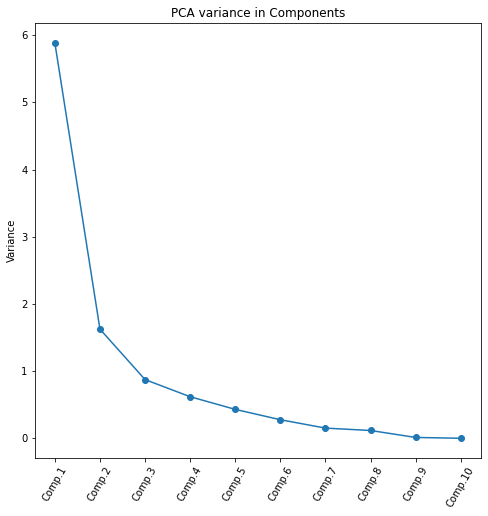

In [25]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.title('PCA variance in Components')
    plt.savefig( out_folder + 'images/class_' + str(classForAnalysis) + '_pca_components_variance' + '.png')            
    plt.show()

screeplot(pca, standardisedX)
 

In [26]:
#summary.sdev**2
#pca.components_[0]
#np.sum(pca.components_[0]**2)

In [27]:
####----
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code, I am using this as (similar to) a library function with some adjustments
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [28]:
####----
calcpc(standardisedX, pca.components_[0])
pca.transform(standardisedX)[:, 0]
pca.transform(standardisedX)[:, 0]
pca.components_[1]
np.sum(pca.components_[1]**2)
#highest loadings for

1.0000000000000016

In [29]:
# Define high and low mortality
# The code below is not used.
# y as defined earlier will rather be used

#import sklearn 
#from sklearn import preprocessing
#standardisedX_mortality = sklearn.preprocessing.scale(df_diff_ratio_mortality)
#standardisedX_mortality = pd.DataFrame(standardisedX_mortality, index=df_diff_ratio_mortality.index, columns=df_diff_ratio_mortality.columns)
#standardisedX_mortality.apply(np.mean), '---', standardisedX_mortality.apply(np.std)
#standardisedX_mortality

####----
# # ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code from the URL above, using this as a library function
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    plt.savefig('./images/pca_components_separating_high_low_mortality' + '.png')            
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX, y)



# Plot first two components

Next section (i.e. four components) is more important than this

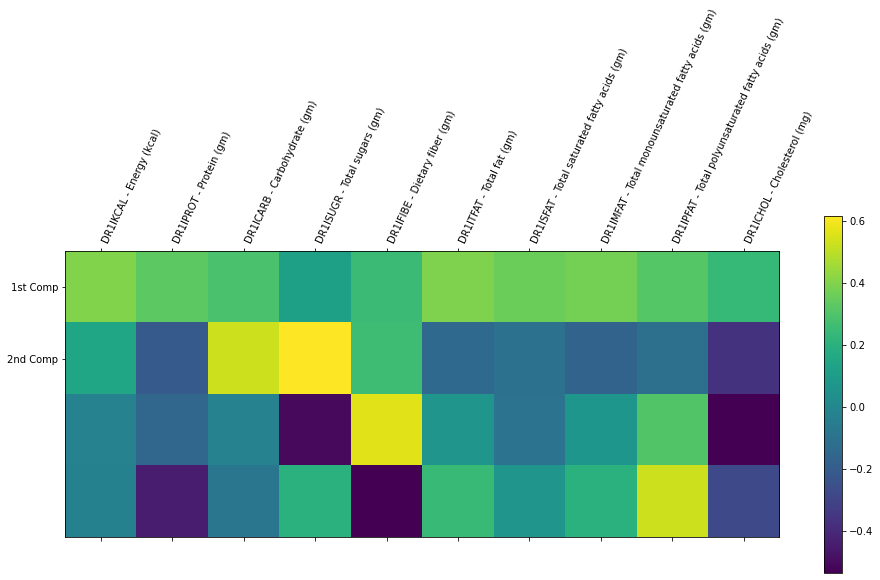

In [30]:
####----
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21


pca_components_cont = pca.components_[0:4]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
#plt.xticks(range(1, len(df_classified.columns)),df_classified.columns[1:len(df_classified.columns)],rotation=65)
plt.xticks(range(len(standardisedX.columns)),standardisedX.columns,rotation=65,ha='left')
#plt.tight_layout()
plt.savefig(out_folder + 'images/class_' + str(classForAnalysis) + '_pca_food_groups_what_contributes_to_PCA_components' + '.png')            
plt.show() # 
# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

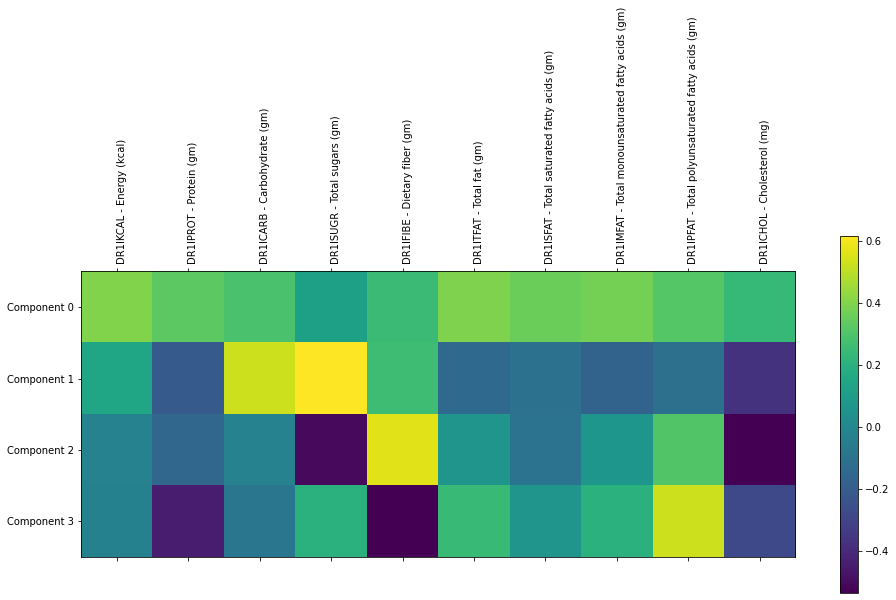

In [31]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 4

pca_components_cont = pca.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c) 
    
plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels, ylabels, fontsize=10)
plt.colorbar()

plt.xticks(range(len(standardisedX.columns)), standardisedX.columns, rotation=90, ha='left')
plt.show()# 

In [32]:
#df_diff_ratio_with_mortality.corr()
standardisedX_with_target.corr()

,DR1IKCAL - Energy (kcal),DR1IPROT - Protein (gm),DR1ICARB - Carbohydrate (gm),DR1ISUGR - Total sugars (gm),DR1IFIBE - Dietary fiber (gm),DR1ITFAT - Total fat (gm),DR1ISFAT - Total saturated fatty acids (gm),DR1IMFAT - Total monounsaturated fatty acids (gm),DR1IPFAT - Total polyunsaturated fatty acids (gm),DR1ICHOL - Cholesterol (mg),URDACT_Albumin_creatinine_ratio_mg_g
DR1IKCAL - Energy (kcal),1.000000,0.750768,0.821517,0.405780,0.608648,0.874442,0.805749,0.822331,0.677703,0.452747,-0.049675
DR1IPROT - Protein (gm),0.750768,1.000000,0.391921,0.042503,0.408277,0.718474,0.668649,0.705087,0.479268,0.634661,-0.041114
DR1ICARB - Carbohydrate (gm),0.821517,0.391921,1.000000,0.682396,0.624645,0.511845,0.480840,0.455606,0.407994,0.124848,-0.038183
DR1ISUGR - Total sugars (gm),0.405780,0.042503,0.682396,1.000000,0.152735,0.136934,0.173170,0.099253,0.058382,0.010980,-0.026280
DR1IFIBE - Dietary fiber (gm),0.608648,0.408277,0.624645,0.152735,1.000000,0.475480,0.403810,0.455725,0.411252,0.090229,-0.024058
DR1ITFAT - Total fat (gm),0.874442,0.718474,0.511845,0.136934,0.475480,1.000000,0.904767,0.956171,0.802296,0.537160,-0.041266
DR1ISFAT - Total saturated fatty acids (gm),0.805749,0.668649,0.480840,0.173170,0.403810,0.904767,1.000000,0.811085,0.527074,0.502703,-0.032275
DR1IMFAT - Total monounsaturated fatty acids (gm),0.822331,0.705087,0.455606,0.099253,0.455725,0.956171,0.811085,1.000000,0.739958,0.535910,-0.040476
DR1IPFAT - Total polyunsaturated fatty acids (gm),0.677703,0.479268,0.407994,0.058382,0.411252,0.802296,0.527074,0.739958,1.000000,0.360698,-0.036353
DR1ICHOL - Cholesterol (mg),0.452747,0.634661,0.124848,0.010980,0.090229,0.537160,0.502703,0.535910,0.360698,1.000000,-0.030366


In [33]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#pd.set_option('display.height', 1000)

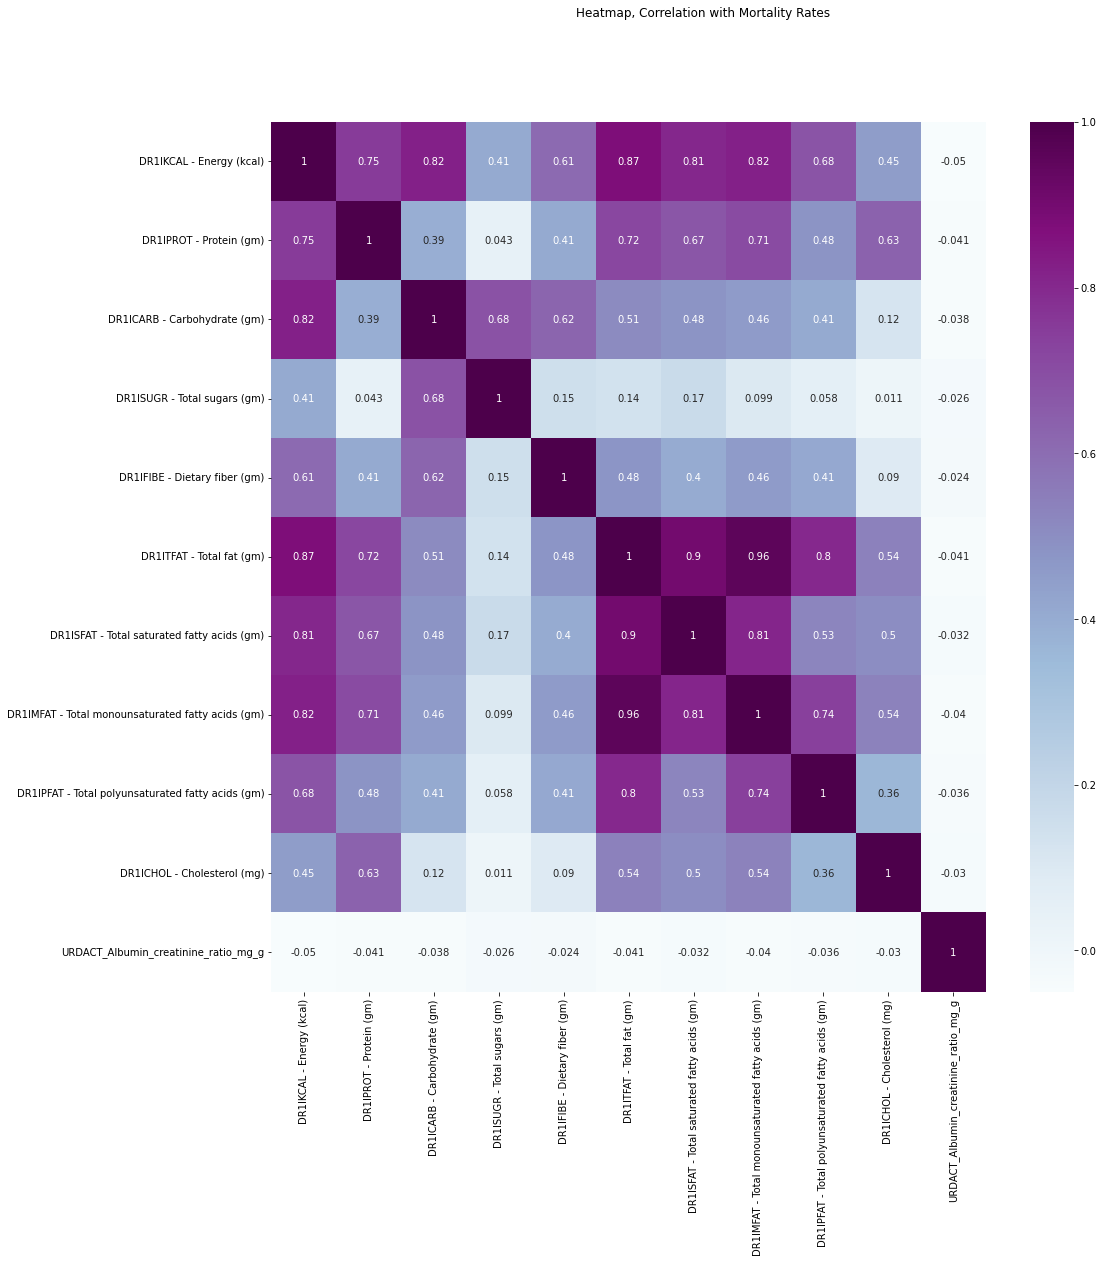

In [34]:
plt.figure(figsize=(16, 16))

corr = standardisedX_with_target.corr() #df_diff_ratio_with_mortality.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,
           cmap="BuPu");
plt.suptitle('Heatmap, Correlation with Mortality Rates');
plt.savefig(out_folder + 'images/class_' + str(classForAnalysis) + '_heatmap-ckd-mortality-regression-after-pca.png')

In [35]:
standardisedX_with_target

,DR1IKCAL - Energy (kcal),DR1IPROT - Protein (gm),DR1ICARB - Carbohydrate (gm),DR1ISUGR - Total sugars (gm),DR1IFIBE - Dietary fiber (gm),DR1ITFAT - Total fat (gm),DR1ISFAT - Total saturated fatty acids (gm),DR1IMFAT - Total monounsaturated fatty acids (gm),DR1IPFAT - Total polyunsaturated fatty acids (gm),DR1ICHOL - Cholesterol (mg),URDACT_Albumin_creatinine_ratio_mg_g
0,0.753588,0.164913,1.766400,1.236734,2.165423,-0.166534,-0.373437,-0.268443,-0.171427,-0.313387,-1.073417
1,1.683818,1.728801,2.265610,0.081527,2.568815,0.391704,0.241061,0.398781,0.064977,0.253673,-1.073417
2,-0.344820,-0.324688,-0.363814,-0.470428,-0.254927,-0.208477,-0.196148,-0.240654,-0.068361,-0.313387,-1.073417
3,-0.108320,-0.472377,0.472384,1.202056,-0.254927,-0.504073,-0.461298,-0.491314,-0.409634,-0.313387,-1.073417
4,0.317378,0.581680,-0.064037,0.608920,-0.507047,0.503551,1.106588,0.126445,-0.318099,0.377717,-1.073417
...,...,...,...,...,...,...,...,...,...,...,...
65632,-0.707452,-0.497666,-0.699130,-0.521723,-0.507047,-0.536029,-0.475679,-0.495483,-0.444590,-0.313387,3.203369
65633,1.930828,2.979103,1.752603,0.030956,1.409064,0.835098,0.534712,0.842301,1.104652,0.714409,3.203369
65634,-0.681174,-0.423822,-0.680733,-0.518833,-0.456623,-0.531036,-0.473849,-0.493260,-0.435941,-0.313387,3.203369
65635,0.333145,-0.472377,1.403490,2.696093,-0.507047,-0.526043,-0.475679,-0.495483,-0.444590,-0.313387,3.203369
